# Frequency Distributions
---
1. Frequency Distributions of all Continuous Variables (Histogram)
2. Most Common for all Categorical Variables  (Bar Chart - Count)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

alpha = 0.05

from scipy.stats import ttest_ind, ttest_1samp, ttest_rel

pd.set_option('display.max_columns', 100)

In [2]:
sns.set(font_scale=1.6)
sns.set(style='ticks')

In [3]:
df = pd.read_csv('./data/qwantify.csv')

In [4]:
df.head()

,startTime_ISO8601,startTime_secondsSinceMidnight1Jan1970UTC,estimatedSecondsSinceAlert,wantingAnything,whatWanting,wantingIntensity,wantedToFeel_control,wantedToFeel_lessStress,wantedToFeel_goodAboutMe,wantedToFeel_connected,wantedToFeel_comfort,wantedToFeel_novelty,wantedToFeel_calm,wantedToFeel_health,wantedToFeel_energy,wantedToFeel_goodPerson,wantedToFeel_competent,wantedToFeel_acknowledged,wantedToFeel_helpful,wantedToFeel_other,wantedToFeel_specifiedOther,wantedToFeel_nothingInParticular,doing,doing_specifiedOther,withOthers,feelingBadToGood,energy,physically_good,physically_energized,physically_hungry,physically_tired,physically_uncomfortable,physically_other,physically_specifiedOther,physically_noFeeling,feeling_angry,feelingIntensity_angry,feeling_anxious,feelingIntensity_anxious,feeling_awe,feelingIntensity_awe,feeling_content,feelingIntensity_content,feeling_frustrated,feelingIntensity_frustrated,feeling_grateful,feelingIntensity_grateful,feeling_happy,feelingIntensity_happy,feeling_jealous,feelingIntensity_jealous,feeling_loving,feelingIntensity_loving,feeling_proud,feelingIntensity_proud,feeling_restless,feelingIntensity_restless,feeling_sad,feelingIntensity_sad,feeling_other,feeling_specifiedOther,feeling_noEmotion,thinkingOverAndOver,comparingToOthers,lonely,selfWorth,appreciating,stressed
0,2017-05-02T20:11:01-07:00,1493781061,2351.0,2,Work on data project,0.494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,talk,NaN,2,0.633,0.771,0,0,1,0,0,0,NaN,0,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.000,NaN,0.0,0.629,0.000,0.000
1,2017-05-02T12:41:30-07:00,1493754090,2354.0,2,Apply to jobs,0.281,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0,chores,NaN,0,0.506,0.629,0,0,0,0,0,0,NaN,1,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,0.426,NaN,0.0,0.500,0.000,0.104
2,2017-05-02T08:34:34-07:00,1493739274,7.0,2,Paint the stairs,0.283,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,other,Meditating,0,0.500,0.502,0,0,0,0,1,0,NaN,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0.175,NaN,0.0,0.363,0.000,0.289
3,2017-05-01T21:34:24-07:00,1493699664,4591.0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,other,Dancing,2,0.633,0.500,0,0,1,0,0,0,NaN,0,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.000,NaN,0.0,0.514,0.791,0.000
4,2017-05-01T15:49:41-07:00,1493678981,8616.0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,other,Looking for a job,0,0.500,0.500,0,0,0,0,0,0,NaN,1,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0.000,NaN,0.0,0.502,0.000,0.143


In [5]:
df['feeling_other'].unique()

array([0])

In [6]:
df['feeling_specifiedOther'].unique()

array([ nan])

In [7]:
cols = df.columns.tolist()

continuous_cols = ['wantingIntensity','feelingBadToGood', 'energy', 'thinkingOverAndOver', \
                   'stressed', 'lonely','selfWorth','appreciating']

feeling_type_cols = cols[cols.index('feeling_angry'):cols.index('feelingIntensity_sad')+1:2] \
                        + ['feeling_other'] \
                        + ['feeling_noEmotion']
        
wanted_to_feel_cols = cols[cols.index('wantedToFeel_control'):cols.index('wantedToFeel_other')+1] \
                        + ['wantedToFeel_nothingInParticular']

feeling_cols = cols[cols.index('feeling_angry'):cols.index('feelingIntensity_sad')+1] + ['feeling_noEmotion']

In [8]:
print len(continuous_cols)

8


## Frequency Distributions
---

### 1. Frequency Distributions of all Continuous Variables (Histogram)

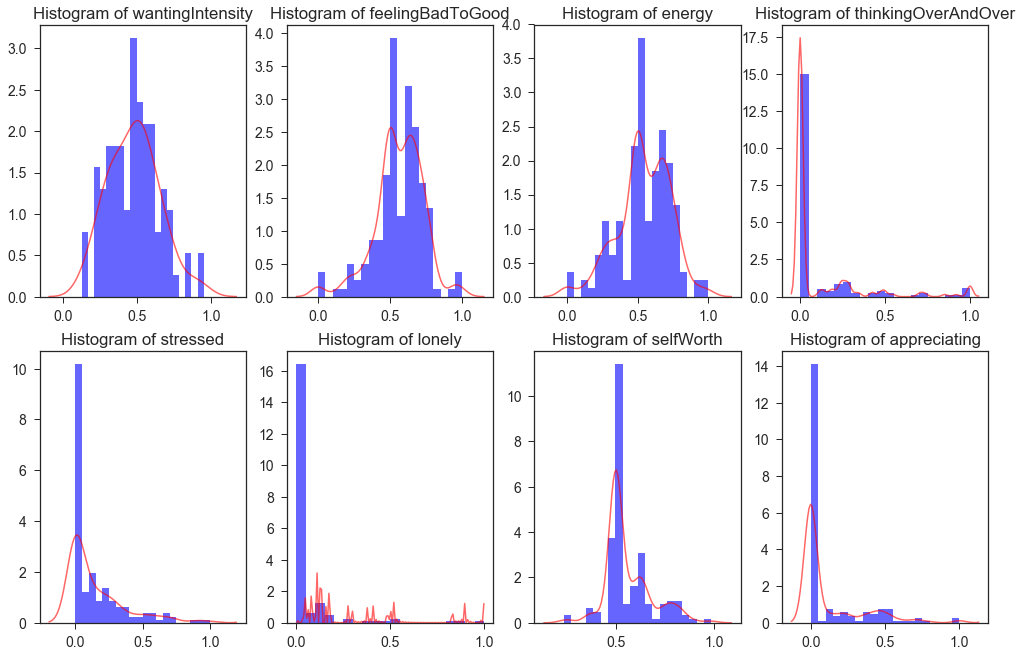

In [39]:
bins = 20
plt.figure(figsize=(17,11))

sns.set(font_scale=1.4, style='ticks')
for i in range(8):
    plt.subplot(2, 4, i+1)
    sns.distplot(a=df[continuous_cols[i]].dropna(axis=0).values, bins=bins, norm_hist=True, kde=True, color='blue', hist_kws={'alpha':0.6}, kde_kws={'color':'red', 'linewidth':1.5, 'alpha':0.6})
    plt.title('Histogram of {}'.format(continuous_cols[i]))
    
plt.savefig('./images/Histogram of Continuous Variables')

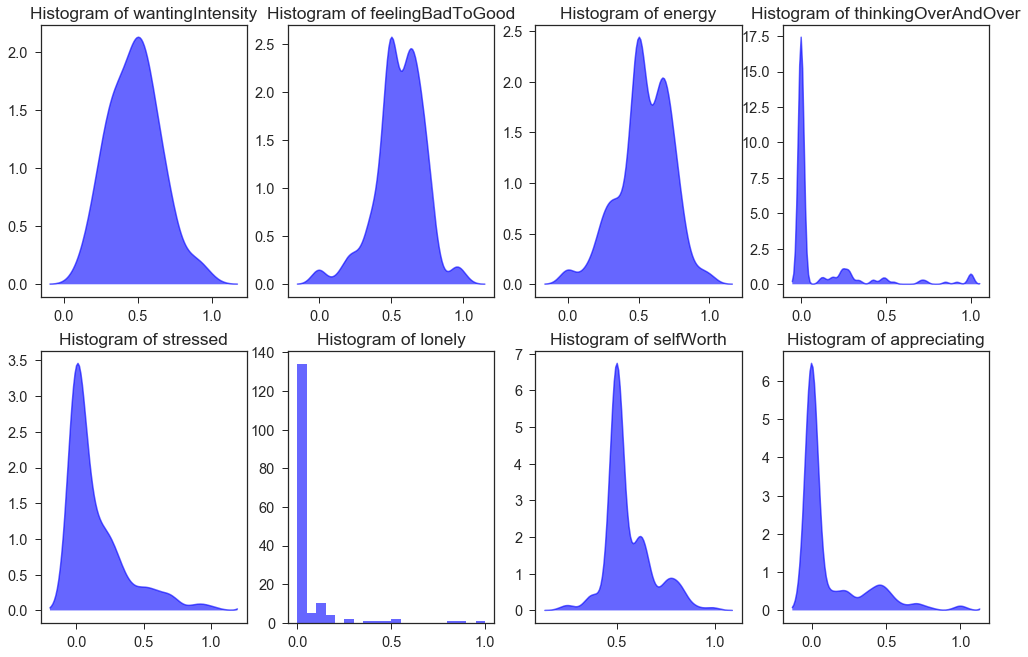

In [40]:
bins = 20
plt.figure(figsize=(17,11))

sns.set(font_scale=1.45, style='ticks')

for i in range(8):
    plt.subplot(2, 4, i+1)
    if i != 5:
        sns.distplot(a=df[continuous_cols[i]].dropna(axis=0).values, hist=False, bins=bins, norm_hist=False, kde=True, color='b', \
                 hist_kws={'alpha':0.6}, \
                 kde_kws={'color':'blue', 'linewidth':1.5, 'alpha':0.6, 'shade':True})
    else:
        sns.distplot(a=df[continuous_cols[i]].dropna(axis=0).values, bins=bins, norm_hist=False, kde=False, color='b', \
                 hist_kws={'color':'blue','alpha':0.6}, \
                 kde_kws={'color':'blue', 'linewidth':1.5, 'alpha':0.4})
    plt.title('Histogram of {}'.format(continuous_cols[i]))
    
plt.savefig('./images/KDE (Histograms) of Continuous Variables')
    
    

## Time Series
---

### 1. Hourly Averages for all Continuous Variables 

In [11]:
df['startTime_ISO8601'] = pd.to_datetime(df['startTime_ISO8601'].apply(lambda x: x[:-6]), format='%Y-%m-%dT%H:%M:%S')

df['hour'] = df['startTime_ISO8601'].dt.hour

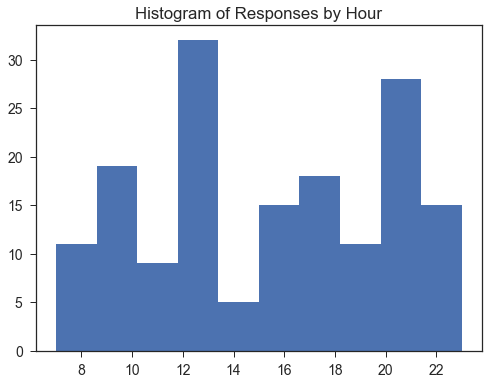

In [34]:
sns.set(font_scale=1.4, style='ticks')

plt.figure(figsize=(8,6))
plt.hist(x=df['hour']);
plt.title('Histogram of Responses by Hour')
plt.savefig('./images/Histogram of Responses by Hour')

In [13]:
font = {'size' : 25}

plt.rc('font', **font)

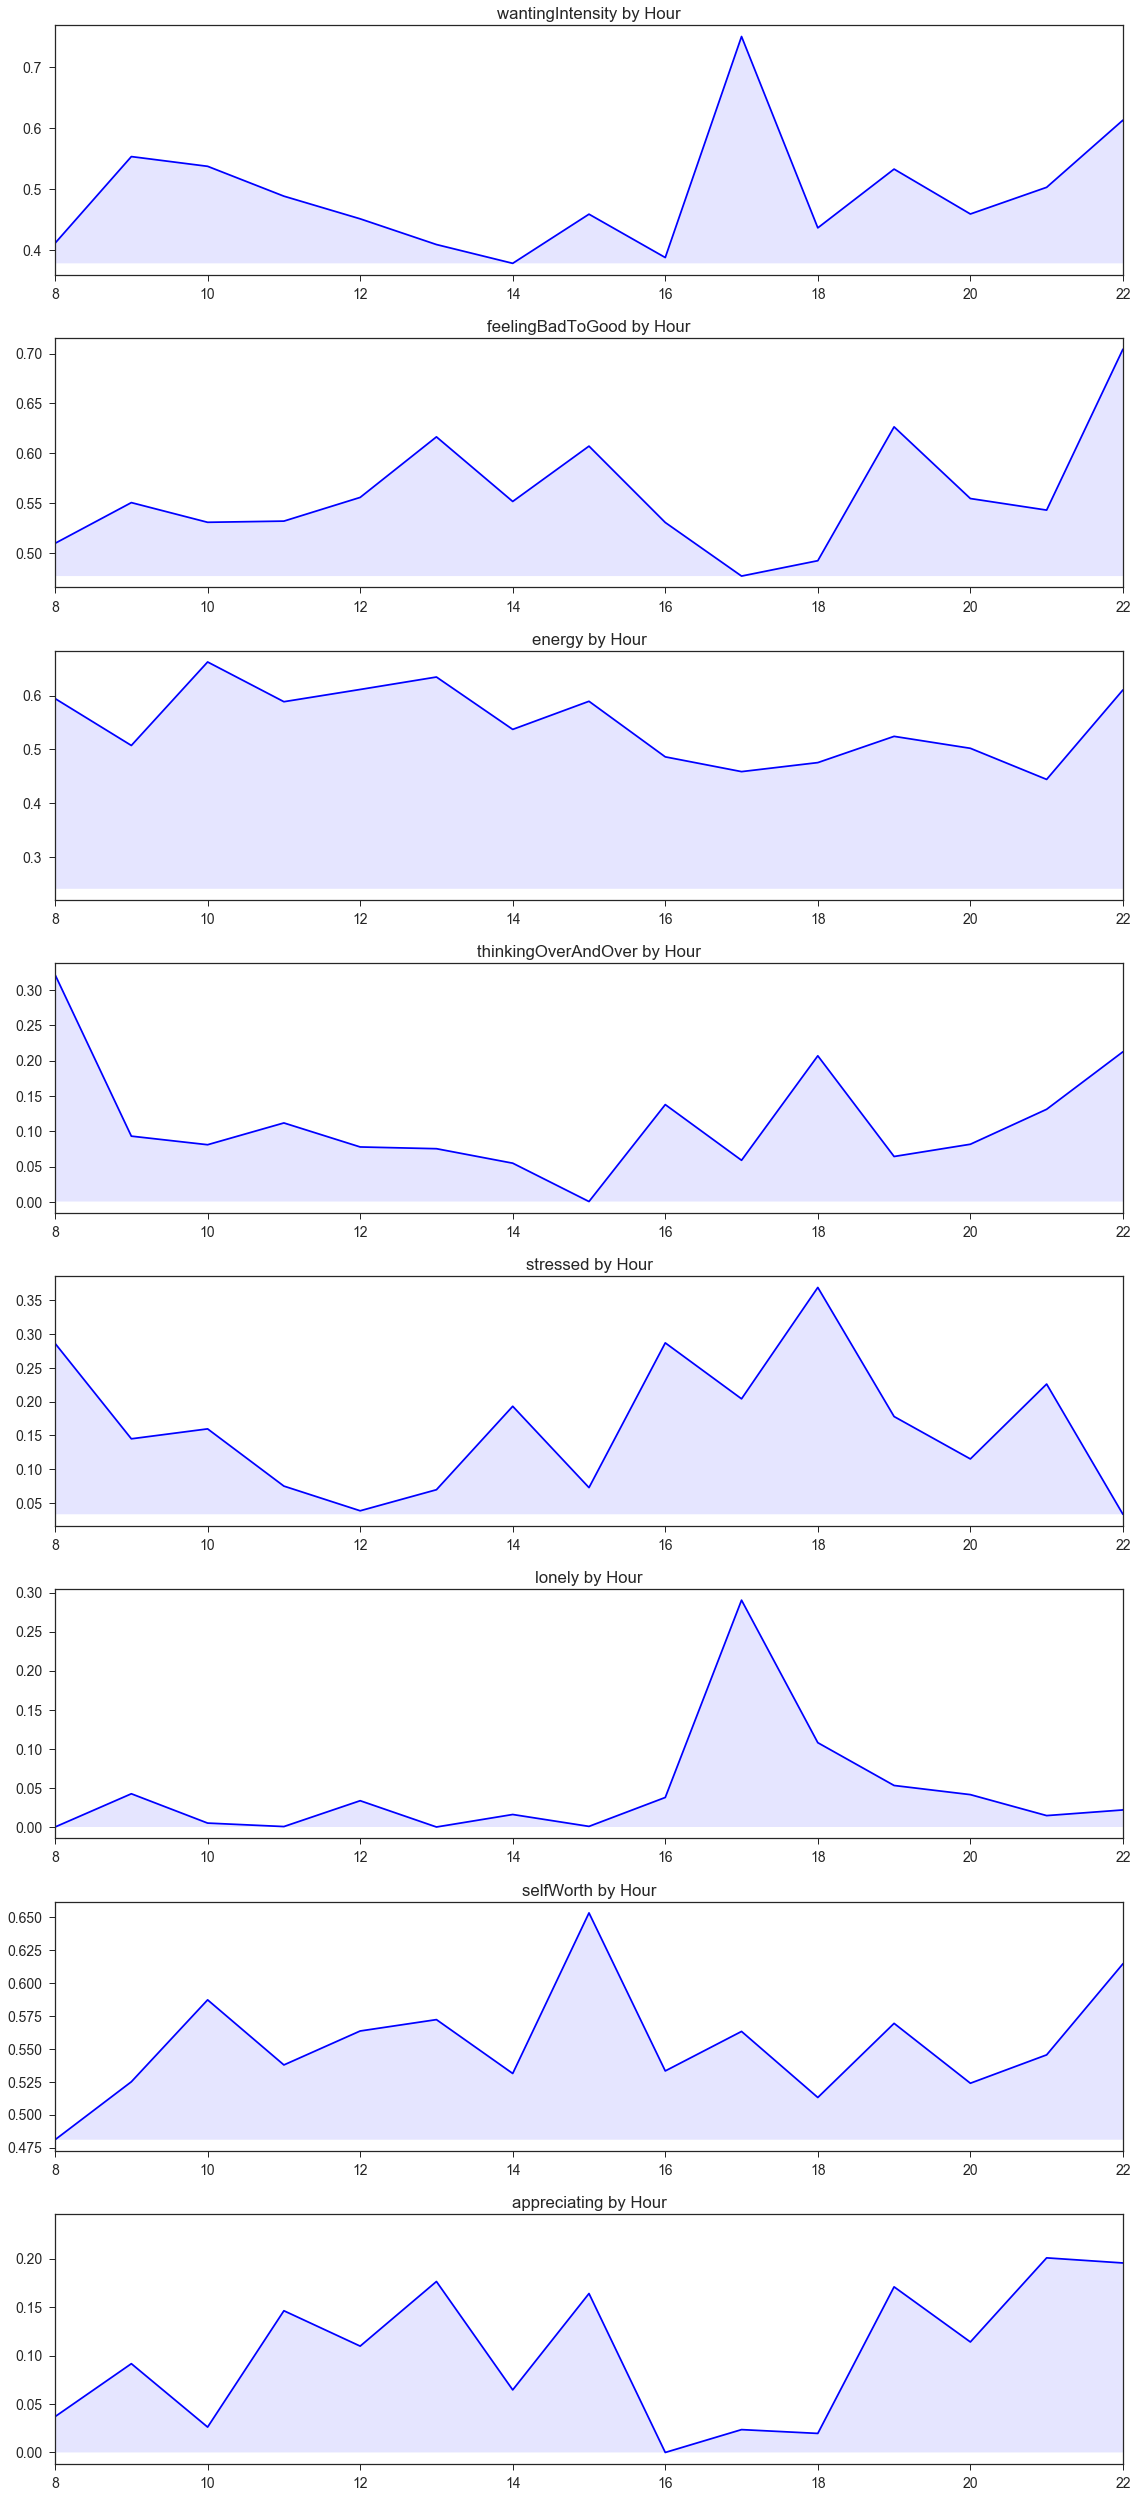

In [35]:
sns.set(font_scale=1.4, style='ticks')

plt.figure(figsize=(16,35))

for i in range(len(continuous_cols)):
    
    plt.subplot(len(continuous_cols), 1, i+1)
    
    grouped = df.iloc[df[continuous_cols[i]].dropna(axis=0).index].groupby(by='hour')[continuous_cols[i]].mean()
    plt.plot(grouped.index.values, grouped.values, color='blue')
    
    plt.fill_between(x=grouped.index.values, y1=grouped.values, y2=np.min(grouped.values), facecolor='blue', alpha=0.1)
    
#     count = df.iloc[df[continuous_cols[i]].dropna(axis=0).index].groupby(by='hour')[continuous_cols[i]].count()
#     plt.plot(count.index.values, count.values)
    
    plt.xlim((8,22))
    
    plt.title('{} by Hour'.format(continuous_cols[i]))

plt.tight_layout()

plt.savefig('./images/Continuous Variables By Hour')

### 2. Daily Averages for All Continuous Variables 

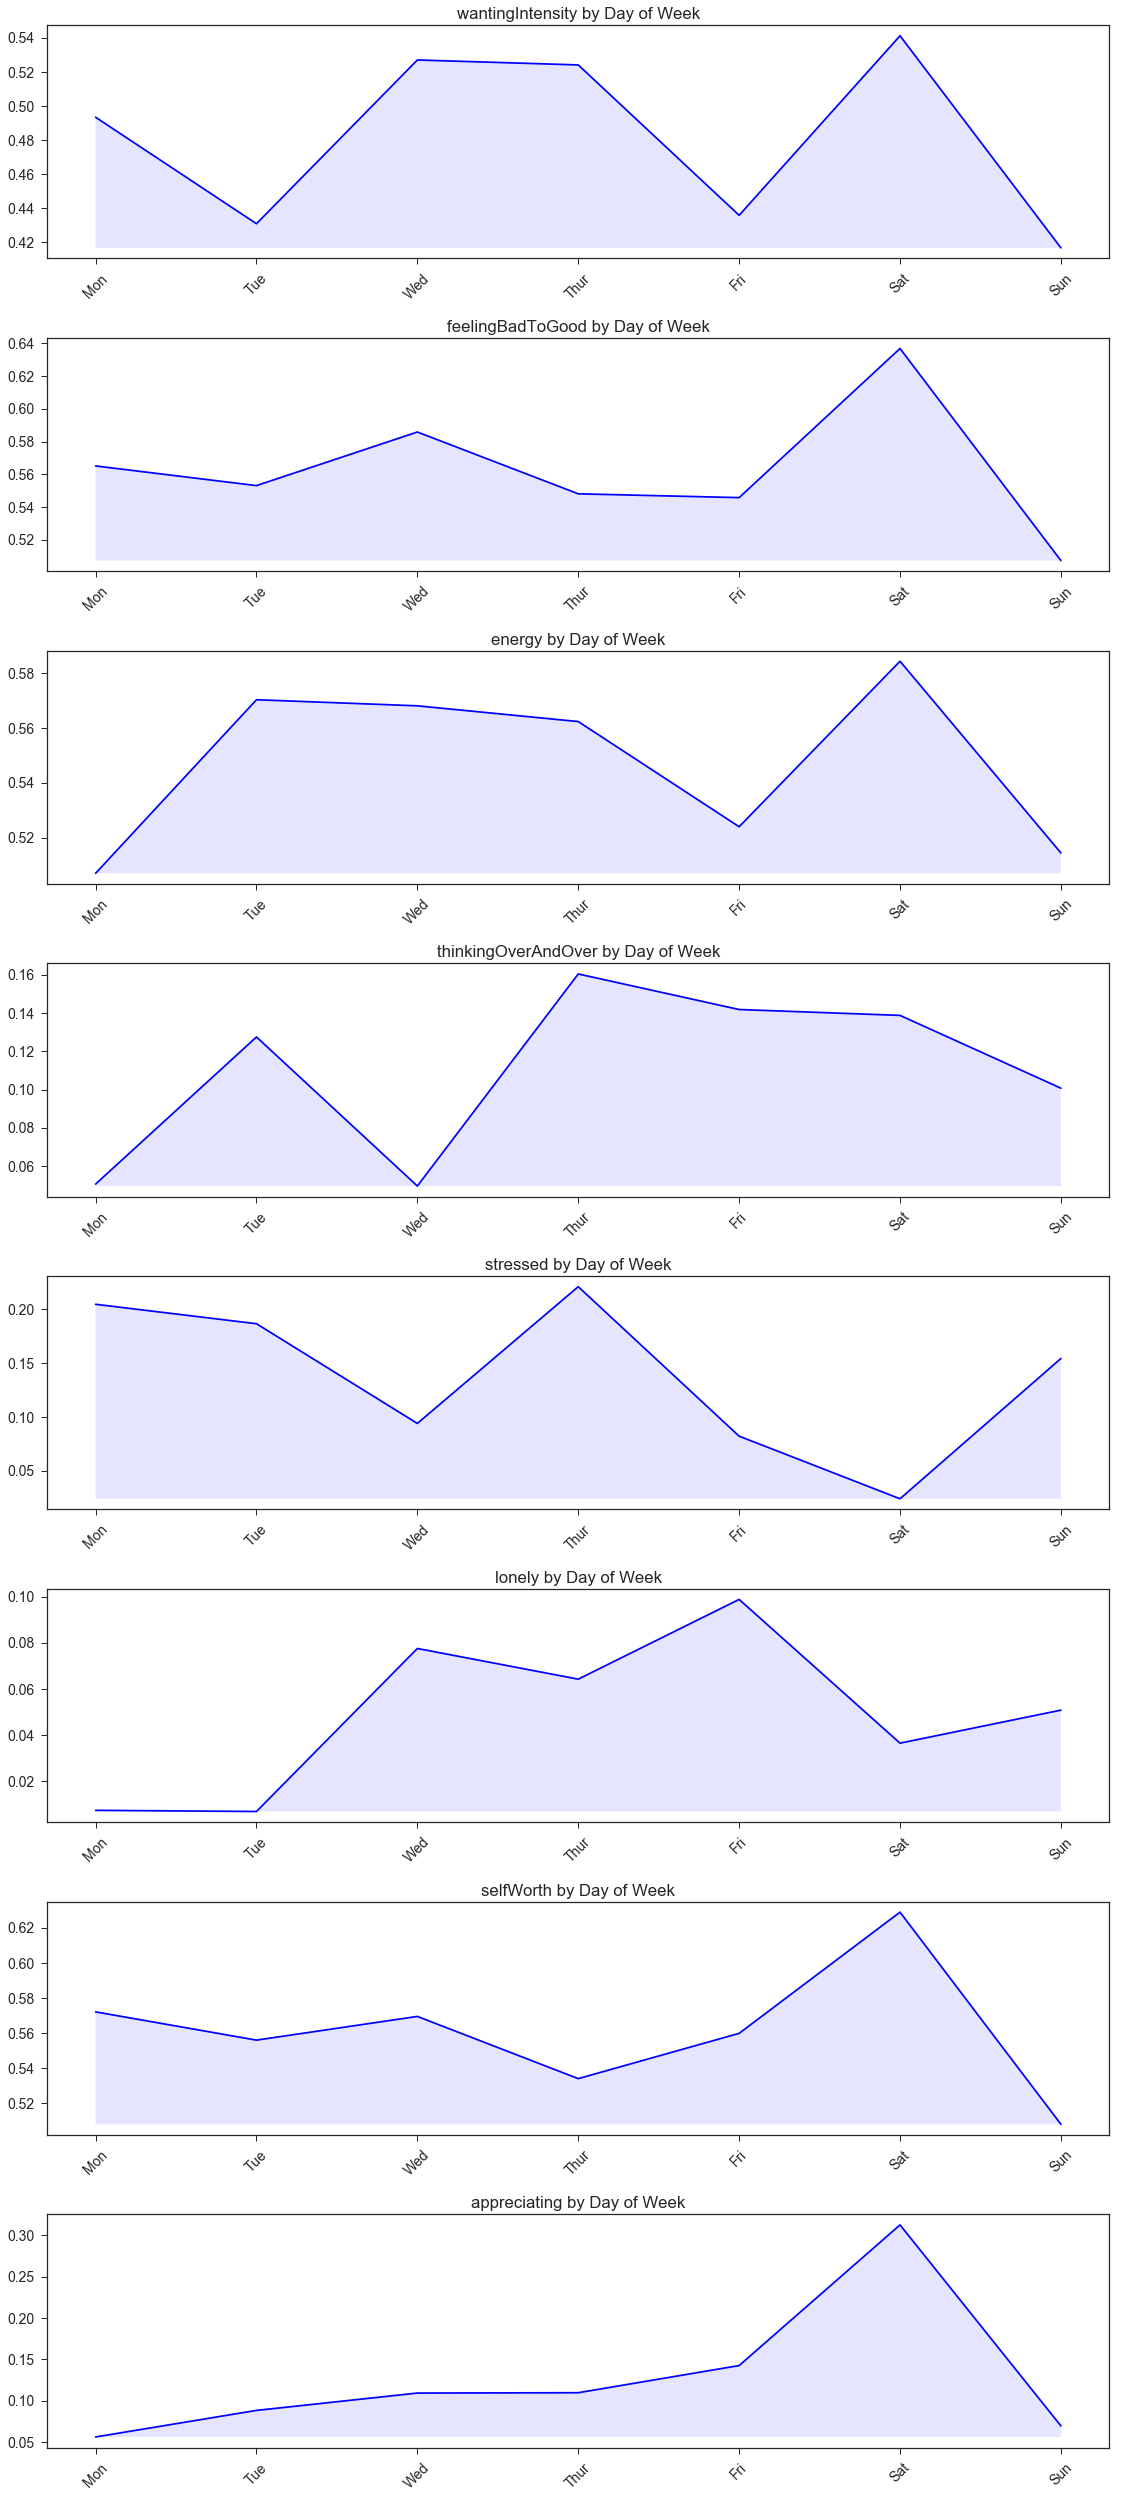

In [36]:
df['dayofweek'] = df['startTime_ISO8601'].dt.dayofweek

labels = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

plt.figure(figsize=(16,35))

sns.set(font_scale=1.4, style='ticks')

for i in range(len(continuous_cols)):
    
    plt.subplot(len(continuous_cols), 1, i+1)
    
    grouped = df.iloc[df[continuous_cols[i]].dropna(axis=0).index].groupby(by='dayofweek')[continuous_cols[i]].mean()
    plt.plot(grouped.index.values, grouped.values, color='blue')

    plt.fill_between(x=grouped.index.values, y1=grouped.values, y2=np.min(grouped.values), facecolor='blue', alpha=0.1)
    
    plt.xticks(grouped.index.values, labels, rotation=45)
    
    plt.title('{} by Day of Week'.format(continuous_cols[i]))
    
plt.tight_layout()

plt.savefig('./images/Continuous Variables By Day of Week')

### 3. Frequencies of Categorical Variables as Stacked Line Chart

Create "No Option Selected" column because some rows have no "wanted to feel" option selected.

In [16]:
df['wantedToFeel_noOptionSelected'] = df[wanted_to_feel_cols].any(axis=1).apply(lambda x: 1 if x is True else 0)

In [17]:
grouped = df[['hour'] + wanted_to_feel_cols + ['wantedToFeel_noOptionSelected']].groupby(by='hour').sum()

summed = grouped.sum(axis=1)

# Drop any columns that are 0 
grouped = grouped.loc[:, (grouped != 0).any(axis=0)]

# Sum columns 
grouped = grouped.iloc[:,:].div(summed, axis=0)

grouped = grouped.iloc[1:,:]

grouped_summed = grouped

for i in range(1,len(grouped_summed.columns)):
    grouped_summed.iloc[:, i] += grouped_summed.iloc[:, i-1]

Plot

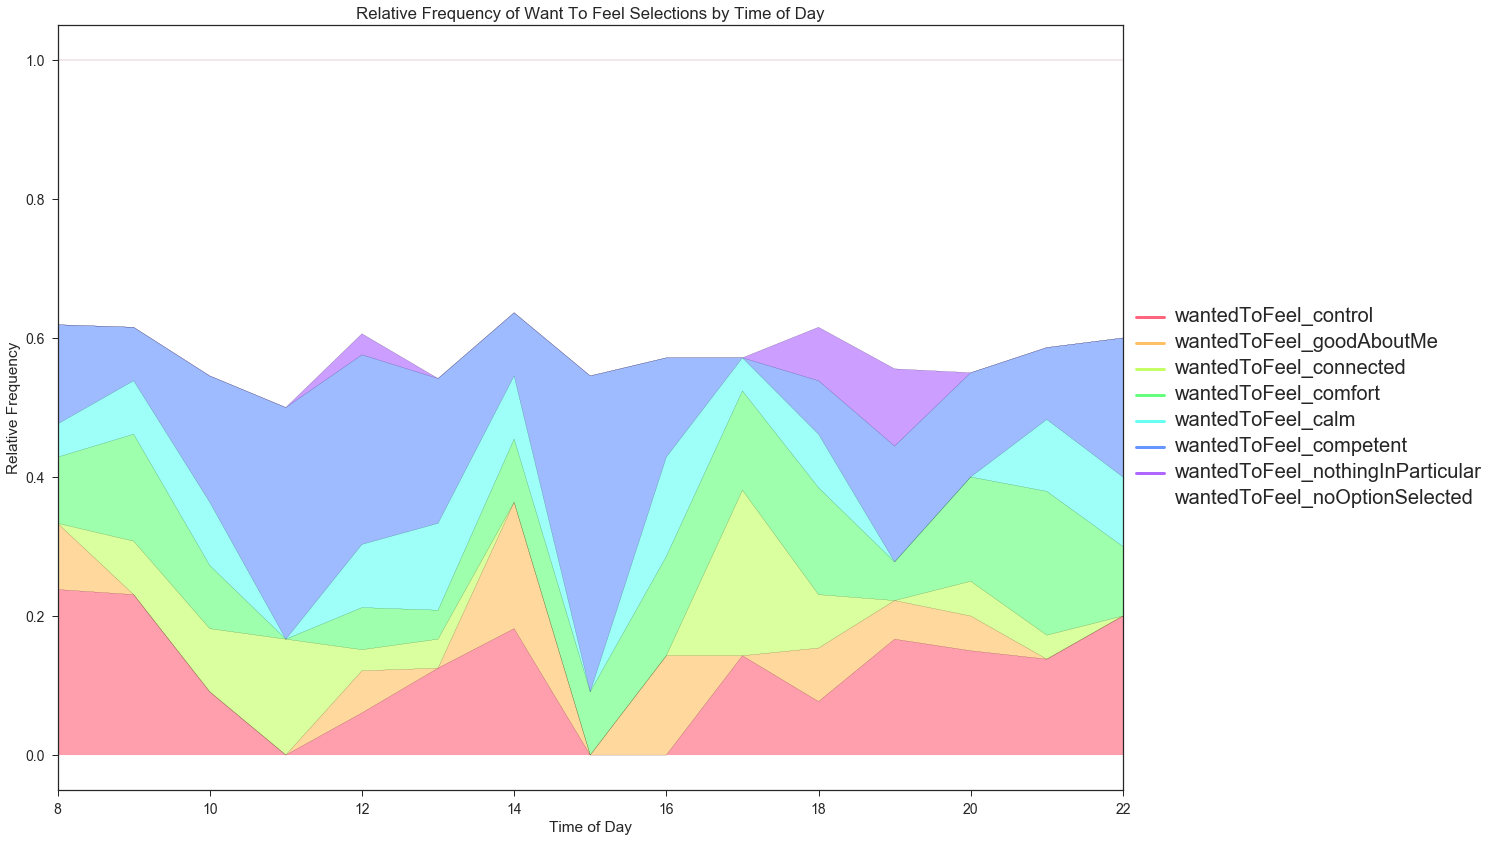

In [18]:
fig, ax = plt.subplots(figsize=(16,12))

color = iter(plt.cm.gist_rainbow(np.linspace(0,1,len(grouped_summed.columns))))

for i in range(len(grouped_summed.columns)):
    
    c = next(color)
    
    label = grouped_summed.iloc[:, i].name

    ls = '-'
    lw = 0.15
    ax.plot(grouped_summed.index.values, grouped_summed.iloc[:, i].values, color=c, label=label, ls=ls, lw=0.1, alpha=0.6, visible=True)
    ax.plot(grouped_summed.index.values, grouped_summed.iloc[:, i].values, color='black', ls=ls, lw=lw, alpha=0.8, visible=True)

    
    alpha = 0.38
    if i == 0:
        ax.fill_between(x=grouped_summed.index.values, y1=grouped_summed.iloc[:, i].values, y2=0, facecolor=c, alpha=alpha)    
    elif i==len(grouped_summed.columns)-1:
        ax.fill_between(x=grouped_summed.index.values, y1=grouped_summed.iloc[:, i].values, y2=grouped_summed.iloc[:, i-1].values, facecolor='white', alpha=alpha)
    else:
        ax.fill_between(x=grouped_summed.index.values, y1=grouped_summed.iloc[:, i].values, y2=grouped_summed.iloc[:, i-1].values, facecolor=c, alpha=alpha)
    
ax.set_xlim((8,22))

ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Time of Day')    
ax.set_title('Relative Frequency of Want To Feel Selections by Time of Day')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

frame = legend.get_frame()

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for i,legobj in enumerate(legend.legendHandles):
    legobj.set_linewidth(3.0)
    if i == len(grouped_summed.columns)-1:
        legobj.set_color('white')

fig.tight_layout()

plt.savefig('./images/want_to_feel_relative_frequency_by_hour', bbox_extra_artists=(legend,), bbox_inches='tight')


### Relative Frequency of Want to Feel by Day of Week

In [19]:
grouped = df[['dayofweek'] + wanted_to_feel_cols + ['wantedToFeel_noOptionSelected']].groupby(by='dayofweek').sum()

summed = grouped.sum(axis=1)

grouped = grouped.loc[:, (grouped != 0).any(axis=0)]

grouped = grouped.iloc[:,:].div(summed, axis=0)

grouped_summed = grouped

for i in range(1,len(grouped_summed.columns)):
    grouped_summed.iloc[:, i] += grouped_summed.iloc[:, i-1]

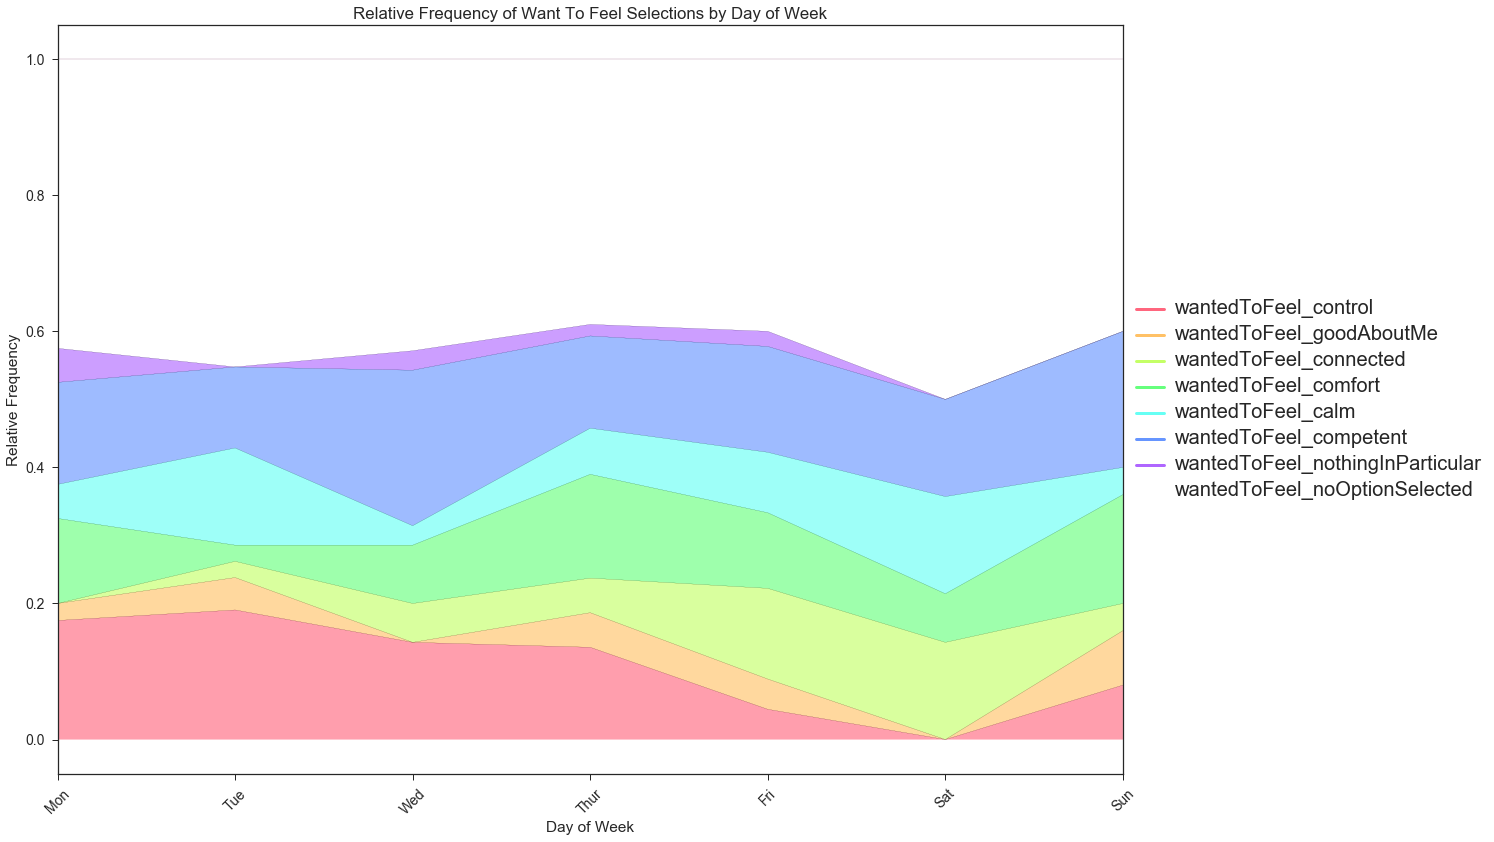

In [27]:
fig, ax = plt.subplots(figsize=(16,12))

color = iter(plt.cm.gist_rainbow(np.linspace(0,1,len(grouped_summed.columns))))

labels = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

for i in range(len(grouped_summed.columns)):
    
    c = next(color)
    
    label = grouped_summed.iloc[:, i].name

    ls = '-'
    lw = 0.15
    ax.plot(grouped_summed.index.values, grouped_summed.iloc[:, i].values, color=c, label=label, ls=ls, lw=0.1, alpha=0.6, visible=True)
    ax.plot(grouped_summed.index.values, grouped_summed.iloc[:, i].values, color='black', ls=ls, lw=lw, alpha=0.8, visible=True)

    
    alpha = 0.38
    if i == 0:
        ax.fill_between(x=grouped_summed.index.values, y1=grouped_summed.iloc[:, i].values, y2=0, facecolor=c, alpha=alpha)    
    elif i==len(grouped_summed.columns)-1:
        ax.fill_between(x=grouped_summed.index.values, y1=grouped_summed.iloc[:, i].values, y2=grouped_summed.iloc[:, i-1].values, facecolor='white', alpha=alpha)
    else:
        ax.fill_between(x=grouped_summed.index.values, y1=grouped_summed.iloc[:, i].values, y2=grouped_summed.iloc[:, i-1].values, facecolor=c, alpha=alpha)
    
ax.set_xlim((0,1))
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Day of Week')    
ax.set_title('Relative Frequency of Want To Feel Selections by Day of Week')

plt.xticks(grouped_summed.index.values, labels, rotation=45)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

frame = legend.get_frame()

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for i,legobj in enumerate(legend.legendHandles):
    legobj.set_linewidth(3.0)
    if i == len(grouped_summed.columns)-1:
        legobj.set_color('white')

fig.tight_layout()

plt.savefig('./images/want_to_feel_relative_frequency_by_day', bbox_extra_artists=(legend,), bbox_inches='tight')

## Aggregations 
---

### 1. Count of Categorical Variables

In [28]:
def get_feeling_type(row):
    for c in feeling_type_cols:
        if row[c] == 1:
            return c

In [29]:
df['feelingType'] = df.apply(get_feeling_type, axis=1)

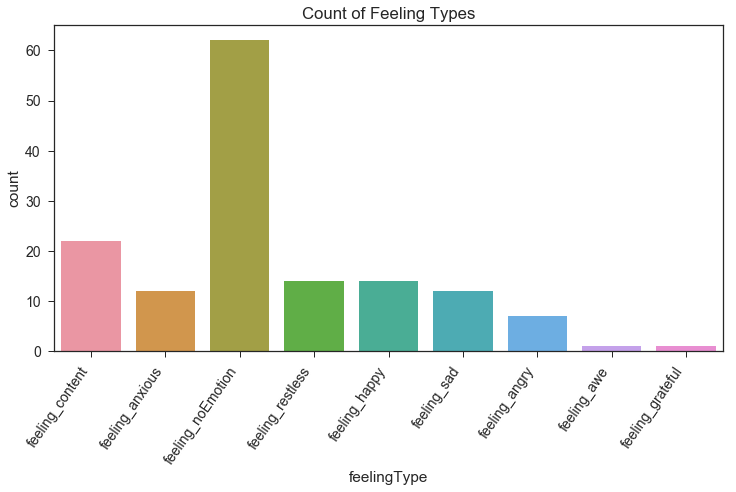

In [37]:
plt.figure(figsize=(12,6))

sns.set(font_scale=1.4, style='ticks')

g = sns.countplot(df[~df['feelingType'].isnull()].loc[:,'feelingType'])

plt.xticks(rotation=55, horizontalalignment='right')
plt.title('Count of Feeling Types')

plt.savefig('./images/Count of Feeling Types')

## Correlations
---

### Find Correlation Between Continuous Variables

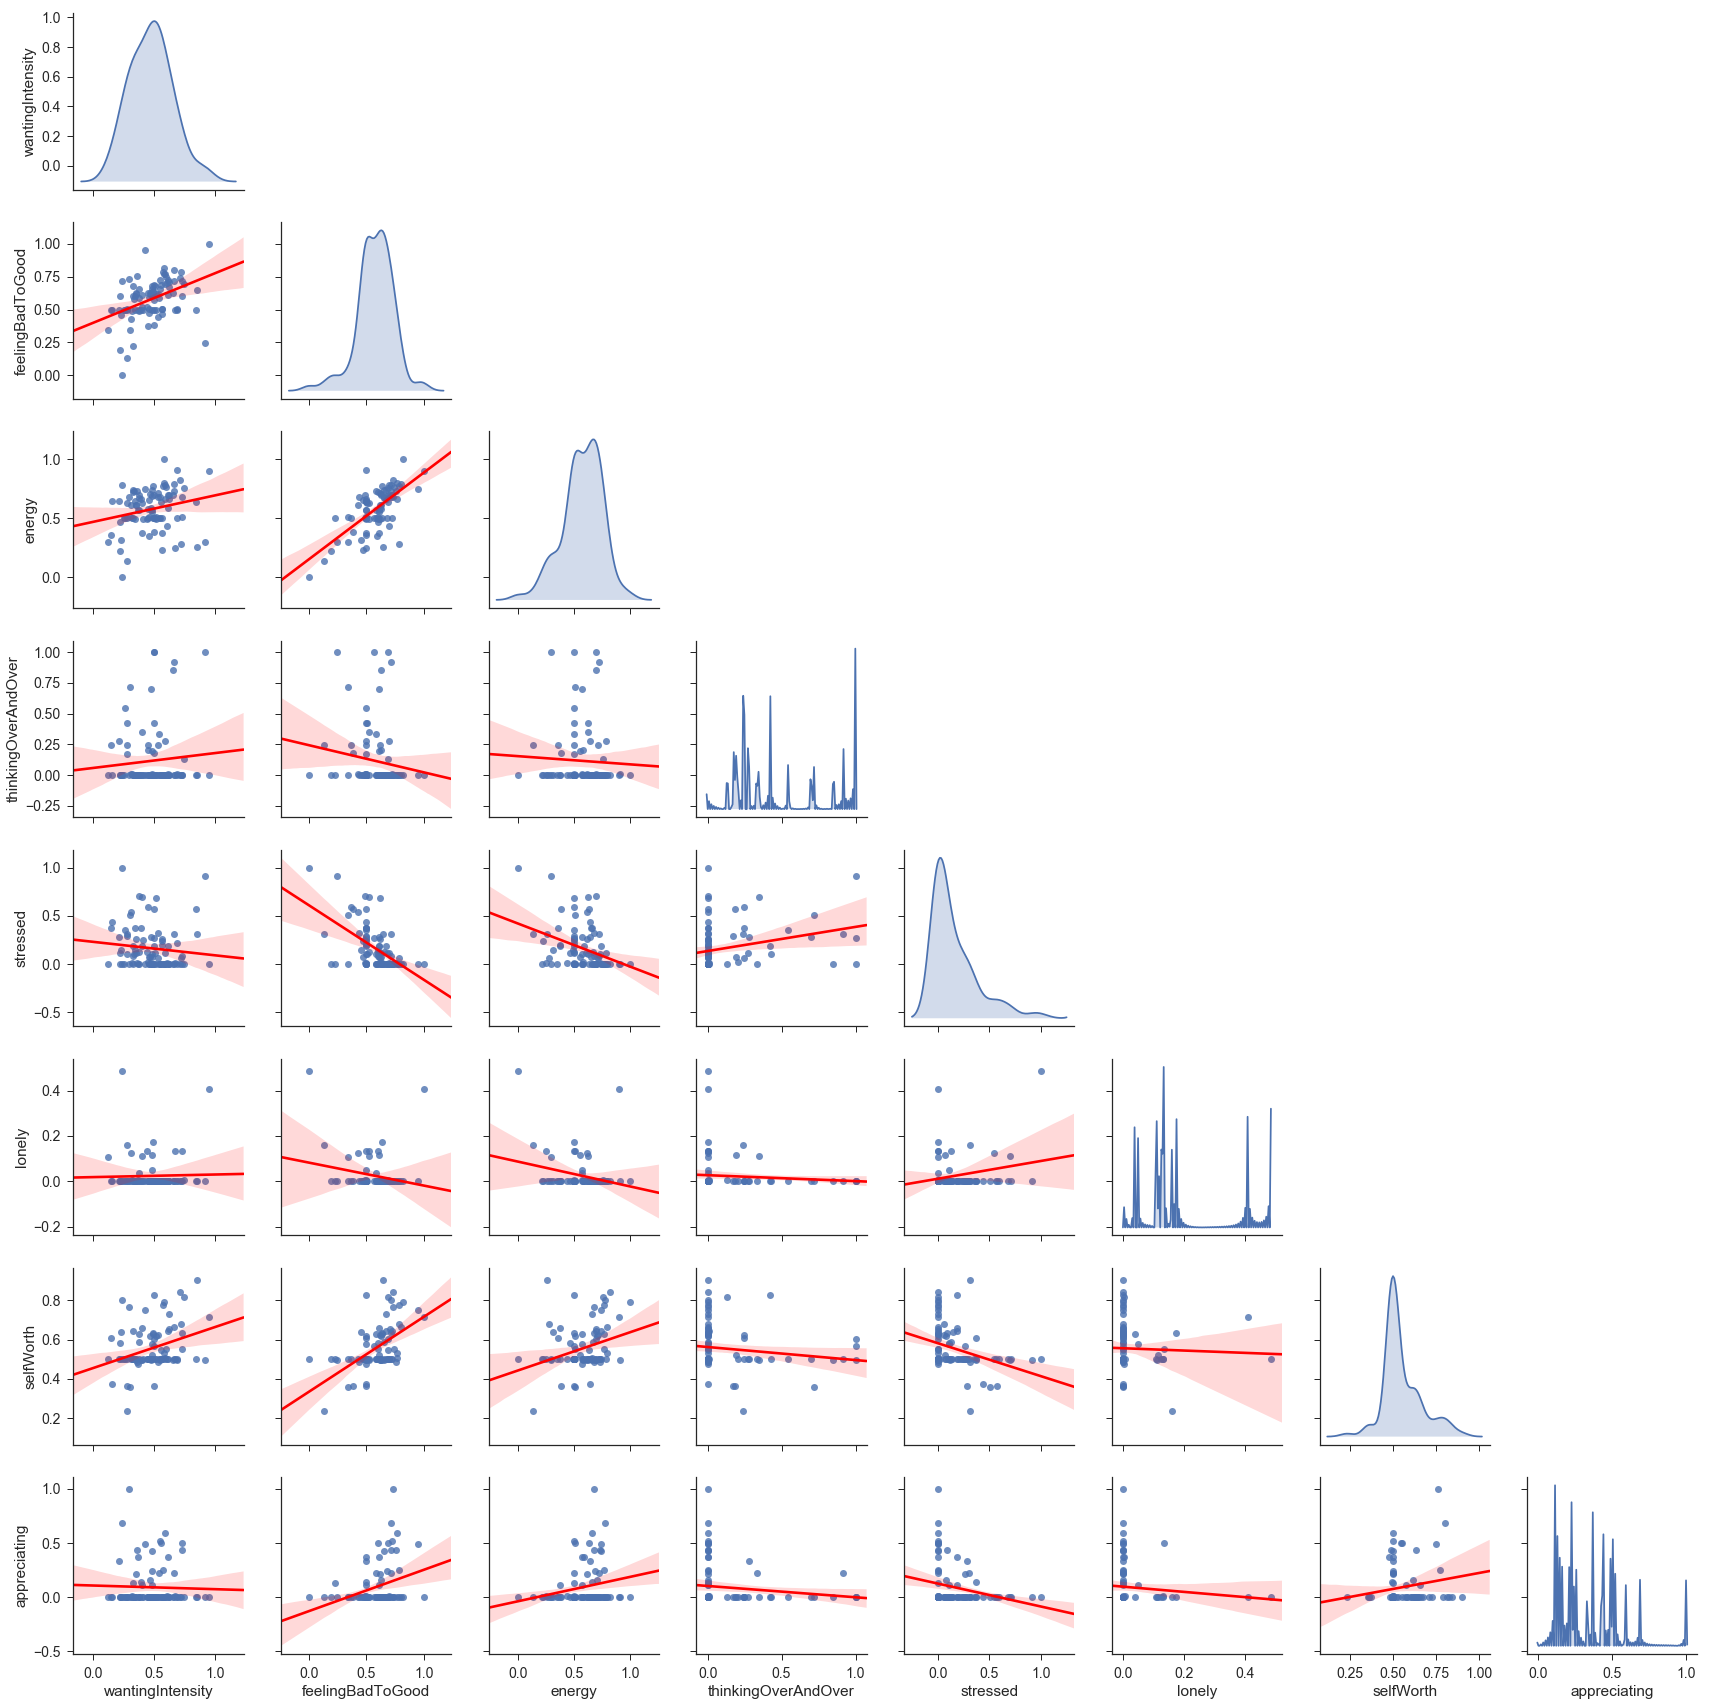

In [38]:
plt.figure(figsize=(17,40))

sns.set(font_scale=1.4)

with sns.axes_style( style="ticks"):
    g = sns.pairplot(df[continuous_cols].dropna(axis=0), kind="reg", diag_kind='kde', size=3, \
                     diag_kws=dict(shade=False), \
                    plot_kws={'line_kws':{'color':'red'}})
    
    for i, j in zip(*np.triu_indices_from(g.axes, 1)):
        g.axes[i,j].set_visible(False)

plt.savefig('./images/Relationships between Continuous Variables')

### Scatter plot of the average Intensity of Want vs. Energy for each activity

In [70]:
# Don't use rows that have 0 wanting, aka drop rows with null values in 'wantingIntensity'
dfc = df[pd.notnull(df['wantingIntensity'])]

# Need to make 2 dataframes, one that is the average intensity of want and average energy grouped by activity
df2 = pd.concat(objs=[dfc['wantingIntensity'], dfc['energy'],dfc['doing']], axis=1)

grouped_means = df2.groupby(by='doing').mean()

# Other dataframe is the frequency count of each activity 
grouped_count = pd.concat(objs=[dfc['doing'],pd.get_dummies(data=dfc['doing'])], axis=1, names=['count']).groupby(by='doing').count().iloc[:,0]

grouped_count.name = 'count'

df2 = pd.concat(objs=[grouped_means, grouped_count], axis=1)

df2['count'] = df2['count'] / df2['count'].sum()

Plot

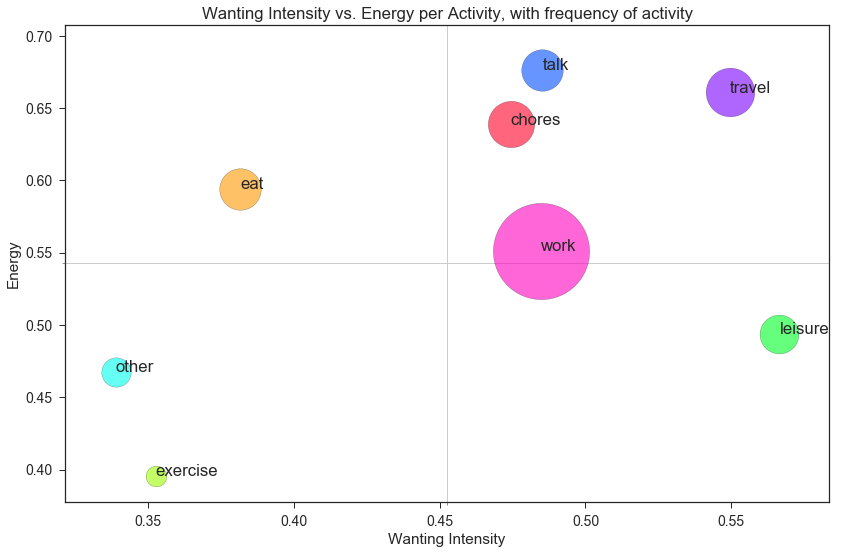

In [182]:
s = [x*20000 for x in df2['count'].values]

c = plt.cm.gist_rainbow(np.linspace(0,1,len(df2.index)))

fig, ax = plt.subplots(figsize=(12,8))

for i in range(len(df2.index.values.tolist())):

    x = df2['wantingIntensity'].values[i]
    y = df2['energy'].values[i]
    ind = df2.index.values[i]
    
    ax.scatter(x, y, s=s[i], c=c[i], alpha=0.6, label=ind, edgecolors='black')
    
    ax.annotate(s=ind, xy=(x,y), )

plt.xlabel('Wanting Intensity')
plt.ylabel('Energy')
plt.title('Wanting Intensity vs. Energy per Activity, with frequency of activity')

mid_y = (plt.ylim()[0] + plt.ylim()[1]) / 2
mid_x = (plt.xlim()[0] + plt.xlim()[1]) / 2

ax.set_yticks([mid_y], minor=True)
ax.set_xticks([mid_x], minor=True)
ax.yaxis.grid(True, which='minor')
ax.xaxis.grid(True, which='minor')


plt.grid(False)

fig.tight_layout()

plt.savefig('./images/intensity_of_want_vs_energy_for_each_activity', bbox_extra_artists=(legend,), bbox_inches='tight')